In [ ]:
from google.colab.patches import cv2_imshow as imshow

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib.offsetbox import AnchoredText

# Functions

In [ ]:
def autoCanny(image, sigma=0.33):
  v = np.median(image)
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  print(lower, upper)
  edged = cv.Canny(image, lower, upper)
  return edged

def canny(img):
	# Convert to graycsale
	# img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	# Blur the image for better edge detection
	# img_blur = cv.GaussianBlur(img_gray, (5,5), 0) 
	# Canny Edge Detection
	# edges = autoCanny(img_blur) # Canny Edge Detection
	edges = autoCanny(img) # Canny Edge Detection
	return edges

In [ ]:
def robert(imgString):
  roberts_cross_v = np.array( [[1, 0 ],
                              [0,-1 ]] )
    
  roberts_cross_h = np.array( [[ 0, 1 ],
                              [ -1, 0 ]] )
  img = cv2.imread(imgString,0).astype('float64')
  img/=255.0
  vertical = ndimage.convolve( img, roberts_cross_v )
  horizontal = ndimage.convolve( img, roberts_cross_h )
    
  edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
  edged_img*=255
  return edged_img

In [ ]:
def sobel(img): 
  # img_blur = cv2.GaussianBlur(img,(5,5), sigmaX=0, sigmaY=0)
  img_blur = img
  # Sobel Edge Detection
  sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
  sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
  sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
  
  return sobelxy

In [ ]:
def prewitt(img):
  # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img_gaussian = cv2.GaussianBlur(gray,(5,5),0)

  #prewitt
  kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
  img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
  img_prewittxy = img_prewittx + img_prewitty

  return img_prewittxy

# Implement

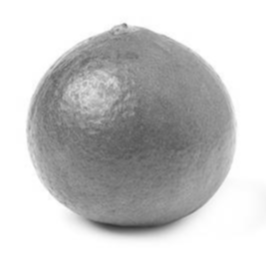

155 255


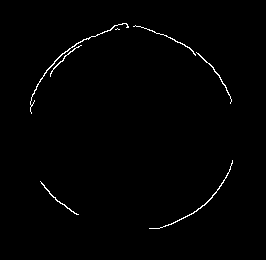

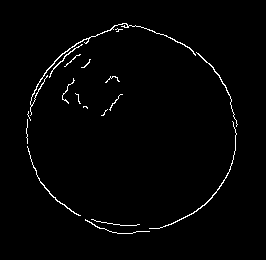

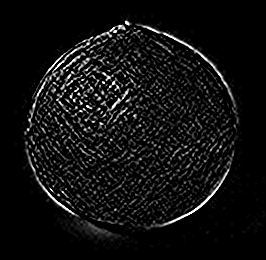

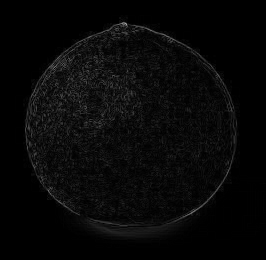

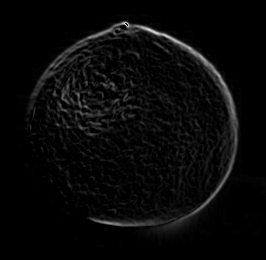

In [ ]:
imgString = 'lime.jpg'
img = cv.imread('lime.jpg', 0)
img_blur = cv.GaussianBlur(img, (3,3), 0) 
imshow(img_blur)

canny = canny(img_blur)
canny2 = cv.Canny(img_blur, 100, 200)
sobel = sobel(img_blur)
robert = robert(imgString)
prewitt = prewitt(img_blur)

imshow(canny)
imshow(canny2)
imshow(sobel)
imshow(robert)
imshow(prewitt)

# Testing

In [ ]:
thresh = cv.imread('lime.jpg',0)
contours,hierarchy = cv.findContours(thresh,2,1)
print (len(contours))
cnt = contours

for i in range (len(cnt)):
    (x,y),radius = cv.minEnclosingCircle(cnt[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv.circle(thresh,center,radius,(0,255,0),2)
    print ('Circle: ' + str(i) + ' - Center: ' + str(center) + ' -     Radius: ' + str(radius))
plt.text(x-15, y+10, '+', fontsize=25, color = 'red')
plt.text(10, -10, 'Centro: '+str(center), fontsize=11, color = 'red')
plt.text(340, -10, 'Diametro: '+str((radius*2)/100)+'mm', fontsize=11, color = 'red')
plt.Circle(x, y, color='red', fill=False)
plt.imshow(thresh, cmap='gray')
plt.show()

0


NameError: ignored

# diameter


## Countouring


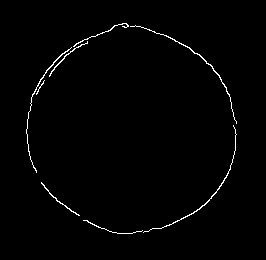

Number of Contours found = 8


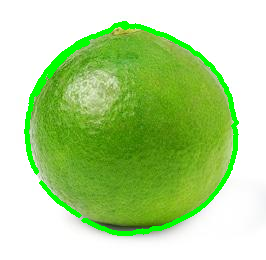

In [ ]:
import cv2
import numpy as np
  
# Let's load a simple image with 3 black squares
image = cv2.imread('lime.jpg')
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
# contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(imgEdge2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
# cv2.imshow('Canny Edges After Contouring', edged)
# imshow(edged)
imshow(imgEdge2)
  
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
  
# cv2.imshow('Contours', image)
imshow(image)

In [ ]:
def adjustBrightnessContrast(img, brightness=0, contrast=1):
  new_image = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)
  return new_image

img = adjustBrightnessContrast(img, -100)



## Calculate

8
Circle: 0 - Center: (112, 225) -     Radius: 29
Circle: 1 - Center: (60, 198) -     Radius: 25
Circle: 2 - Center: (188, 178) -     Radius: 69
Circle: 3 - Center: (40, 87) -     Radius: 8
Circle: 4 - Center: (53, 109) -     Radius: 64
Circle: 5 - Center: (68, 58) -     Radius: 25
Circle: 6 - Center: (183, 74) -     Radius: 71
Circle: 7 - Center: (100, 35) -     Radius: 29


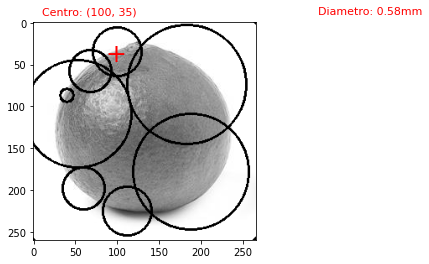

In [ ]:
# thresh = cv.imread('lime.jpg',0)

contours,hierarchy = cv.findContours(imgEdge2,2,1)
print (len(contours))
cnt = contours

for i in range (len(cnt)):
    (x,y),radius = cv.minEnclosingCircle(cnt[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv.circle(thresh,center,radius,(0,255,0),2)
    print ('Circle: ' + str(i) + ' - Center: ' + str(center) + ' -     Radius: ' + str(radius))
plt.text(x-15, y+10, '+', fontsize=25, color = 'red')
plt.text(10, -10, 'Centro: '+str(center), fontsize=11, color = 'red')
plt.text(340, -10, 'Diametro: '+str((radius*2)/100)+'mm', fontsize=11, color = 'red')
plt.Circle(x, y, color='red', fill=False)
plt.imshow(thresh, cmap='gray')
plt.show()